In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import get_total_system_costs, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand, colormap_simulations
from pathlib import Path
from project.write_output import plot_compare_scenarios

# New comparisons

## Loading scenarios

In [2]:
scenarios = pd.read_csv(Path('eoles') / Path('inputs') / Path('xps') / Path('20240220') / Path('scenarios.csv'), index_col=0)

## Loading outputs

In [3]:
dict_output = {}
# list all files in a folder with path folderpath 
folderpath = Path('eoles') / Path('outputs') / Path('20240220')
for path in folderpath.iterdir():
    if path.is_dir():
        dict_output[path.name.split('_')[1]] = path

output = get_total_system_costs(dict_output)
output = pd.concat([output[k] for k in output.keys()], axis=0)

scenarios_complete = pd.concat([scenarios, output.T], axis=1)
scenarios_complete.to_csv(Path('eoles') / Path('outputs') / Path('20240220') / Path('scenarios_complete.csv'))

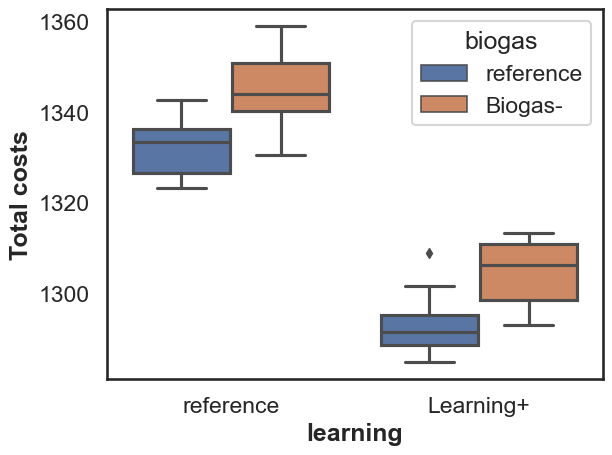

In [12]:
sns.boxplot(data=scenarios_complete, x='learning', y='Total costs', hue='biogas')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'add_patch'

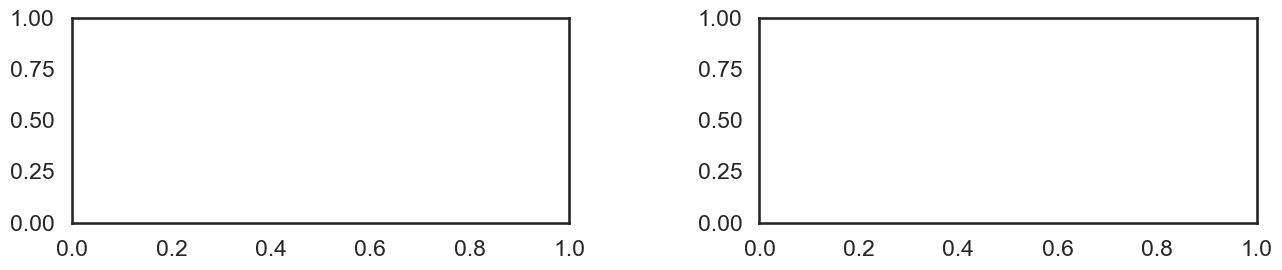

In [14]:
L = ['learning', 'elasticity']  # Add your variable names here

# Define the number of rows and columns for subplots based on the length of L
n = len(L)
ncols = 2  # Define number of columns per row
nrows = n // ncols + (n % ncols > 0)  # Calculate required number of rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
fig.tight_layout(pad=5.0)

# Flatten axes array if more than one row
if nrows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterate over variables and create a boxplot for each
for i, variable in enumerate(L):
    sns.boxplot(data=scenarios_complete, x=variable, y='Total costs', hue='biogas', ax=axes[i])
    axes[i].set_title(f'Boxplot of Total costs by {variable} and biogas')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplots if L does not fill up the entire grid
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.show()

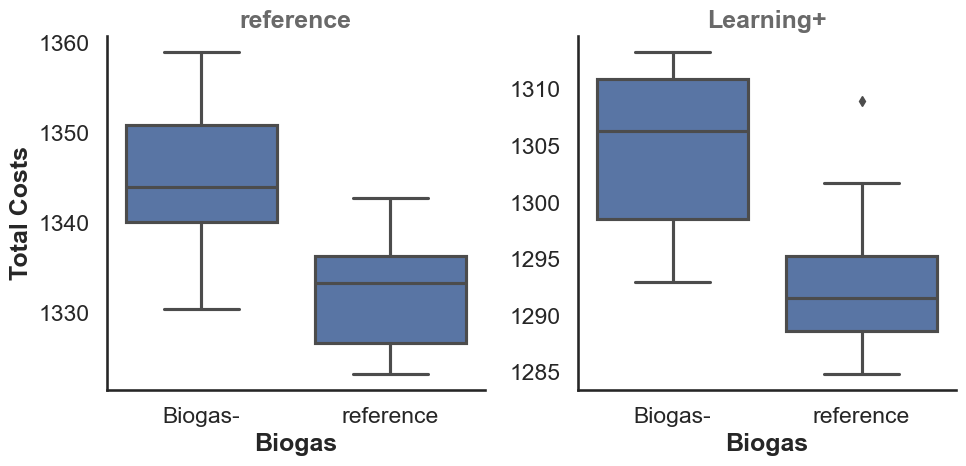

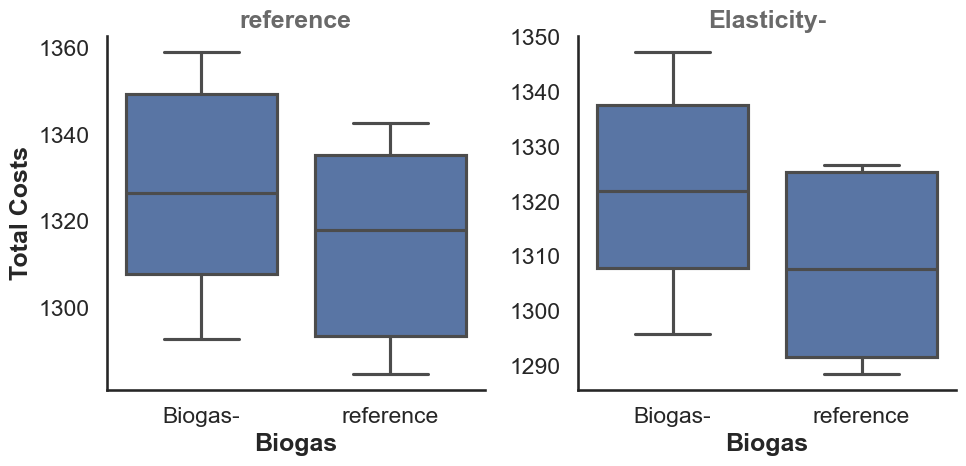

In [13]:
L = ['learning', 'elasticity']  # Add your variables here

for variable in L:
    # Create a FacetGrid for each variable. Since we are not faceting by row or column, we use hue.
    g = sns.FacetGrid(scenarios_complete, col=variable, col_wrap=2, sharex=False, sharey=False, height=5, aspect=1)
    
    # Map a boxplot to the FacetGrid
    g.map(sns.boxplot, 'biogas', 'Total costs', order=sorted(scenarios_complete['biogas'].unique()))
    
    # Adjust the axis labels and plot titles as needed
    g.set_axis_labels('Biogas', 'Total Costs')
    g.set_titles('{col_name}')

    # Adjust the layout so titles and labels don't overlap
    g.fig.tight_layout(w_pad=1)
    
    # Show the plot
plt.show()

In [5]:
scenarios_complete

,biogas,capacity,policy,learning,elasticity,Investment electricity costs,Investment heater costs,Investment insulation costs,Functionment costs,Health costs,...,offshore,onshore,pv,battery,hydro,peaking plants,methanization,pyrogazification,Generation methanization (TWh),Generation pyrogazification (TWh)
S0,reference,reference,Ban,reference,reference,215.875078,351.315509,169.644474,596.506217,86.015425,...,43.245040,60.4,72.787097,1.040993,18.46,62.933206,5.251741,2.192031,46.0,19.202192
S1,reference,reference,Ban,reference,Elasticity-,214.467580,327.269996,175.890095,605.578036,102.949936,...,41.865281,60.4,74.545048,0.874413,18.46,61.967816,5.251741,2.192031,46.0,19.202192
S2,reference,reference,Ban,Learning+,reference,217.826514,313.751217,166.841477,586.411244,81.915820,...,44.234807,60.4,72.171177,1.183107,18.46,63.826438,5.251741,2.192031,46.0,19.202192
S3,reference,reference,Ban,Learning+,Elasticity-,215.273806,297.851525,174.424021,601.053950,100.172080,...,42.465814,60.4,73.116661,0.940455,18.46,62.312460,5.251741,2.192031,46.0,19.202192
S4,reference,reference,BanNoPolicy,reference,reference,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S91,Biogas-,Ren-,Package2024,Learning+,Elasticity-,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S92,Biogas-,Ren-,NoPolicy,reference,reference,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S93,Biogas-,Ren-,NoPolicy,reference,Elasticity-,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S94,Biogas-,Ren-,NoPolicy,Learning+,reference,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
scenarios_complete.describe()

,Investment electricity costs,Investment heater costs,Investment insulation costs,Functionment costs,Health costs,Total costs,Stock Heat pump (Million),Stock Direct electric (Million),Stock Natural gas (Million),Stock Wood fuel (Million),...,offshore,onshore,pv,battery,hydro,peaking plants,methanization,pyrogazification,Generation methanization (TWh),Generation pyrogazification (TWh)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,224.822446,320.787327,171.399952,600.455049,89.666381,1317.464774,19.703871,7.538426,2.171879,6.097670,...,42.940365,59.066667,113.818670,11.792849,1.846000e+01,58.096201,4.749401,1.360886,41.600000,11.921361
std,8.358370,18.858974,3.399698,7.241251,10.285975,22.218298,1.780374,1.626028,2.645613,0.495497,...,2.966544,1.917853,31.399145,11.153253,3.613448e-15,5.814037,0.625757,1.035343,5.481002,9.069602
min,214.467580,297.851525,166.841477,585.331868,76.694389,1284.830453,16.934325,4.948562,0.872544,5.156136,...,39.000000,56.400000,72.171177,0.874413,1.846000e+01,46.370395,3.995890,0.114168,35.000000,1.000114
25%,216.586023,302.799983,169.182062,596.972803,81.902726,1295.421823,18.410831,6.313731,0.872544,5.872462,...,39.000000,56.400000,92.269059,3.048602,1.846000e+01,53.461938,3.995890,0.114168,35.000000,1.000114
50%,223.498754,319.179089,170.365054,601.502887,86.002821,1318.242766,19.296310,7.628504,0.872544,6.287596,...,45.400000,60.400000,98.700000,5.334227,1.846000e+01,58.514828,5.251741,2.192031,46.000000,19.202192
75%,231.869237,327.293516,174.460711,605.410330,100.161704,1335.997783,20.727412,8.889318,0.872544,6.444711,...,45.400000,60.400000,138.700000,20.983407,1.846000e+01,62.623875,5.251741,2.192031,46.000000,19.202192
max,241.071848,351.348276,175.939876,610.892877,102.949936,1358.954070,22.467188,9.594365,7.623904,6.623025,...,45.400000,60.400000,164.500000,36.397755,1.846000e+01,67.284939,5.251741,2.192031,46.000000,19.202192


In [3]:
o['capacity']

,S83,S33,S80,S17,S0,S34,S50,S35,S66,S24,...,S10,S1,S49,S2,S64,S82,S16,S26,S3,S51
offshore,39.000000,39.000000,39.000000,45.400000,43.245040,39.000000,45.400000,39.000000,45.400000,45.400000,...,45.400000,41.865281,45.400000,44.234807,45.400000,39.000000,45.400000,45.400000,42.465814,45.400000
onshore,56.400000,56.400000,56.400000,60.400000,60.400000,56.400000,60.400000,56.400000,60.400000,60.400000,...,60.400000,60.400000,60.400000,60.400000,60.400000,56.400000,60.400000,60.400000,60.400000,60.400000
pv,138.700000,88.827321,138.700000,98.700000,72.787097,95.743788,100.922212,90.365911,164.500000,160.422201,...,85.666183,74.545048,98.700000,72.171177,164.500000,138.700000,98.700000,153.570892,73.116661,98.700000
battery,21.233872,1.851941,23.459306,4.881217,1.040993,3.104804,9.375891,2.154632,36.397755,24.473815,...,3.029868,0.874413,3.920215,1.183107,31.316176,29.364709,5.193926,20.232009,0.940455,5.326923
hydro,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,...,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000
peaking plants,50.924503,61.936824,52.903384,65.361333,62.933206,63.340882,56.526177,62.205306,59.529741,49.272015,...,55.179008,61.967816,59.472840,63.826438,58.327068,55.137601,66.332336,51.776356,62.312460,58.702588
methanization,3.995890,5.251741,3.995890,5.251741,5.251741,5.251741,3.995890,5.251741,3.995890,5.251741,...,5.251741,5.251741,3.995890,5.251741,3.995890,3.995890,5.251741,5.251741,5.251741,3.995890
pyrogazification,0.114168,2.192031,0.114168,2.192031,2.192031,2.192031,0.114168,2.192031,0.114168,2.192031,...,2.192031,2.192031,0.114168,2.192031,0.114168,0.114168,2.192031,2.192031,2.192031,0.114168


In [11]:
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(dict_output['S0'], 'coupling_results.pkl'), "rb") as file:
        output = load(file)

In [12]:
output.keys()

dict_keys(['Capacities (GW)', 'New capacities (GW)', 'Generation (TWh)', 'Primary generation (TWh)', 'Conversion generation (TWh)', 'Charging capacity (GW)', 'Energy capacity (GW)', 'Annualized new investments (1e9€/yr)', 'Annualized costs new energy capacity (1e9€/yr)', 'Annualized costs historical capacity (1e9€/yr)', 'Annualized costs historical energy capacity (1e9€/yr)', 'System functionment (1e9€/yr)', 'Prices (€/MWh)', 'Emissions (MtCO2)', 'Carbon value (€/tCO2)', 'Peak electricity load', 'Peak heat load', 'Subsidies (%)', 'ResIRF costs (Billion euro)', 'ResIRF costs eff (euro/kWh)', 'ResIRF consumption (TWh)', 'ResIRF consumption yearly (TWh)', 'ResIRF consumption savings (TWh)', 'ResIRF replacement heater (Thousand)', 'ResIRF stock heater (Thousand)', 'Annualized system costs (Billion euro / year)', 'Transport and distribution costs (Billion euro / year)', 'Output global ResIRF ()', 'Stock global ResIRF ()', 'Spot price EOLES (€ / MWh)', 'Hourly generation 2050 (GWh)', 'Energy

In [4]:
capacities = output["Capacities (GW)"]
capacities.loc["offshore"] = capacities.loc["offshore_f"] + capacities.loc["offshore_g"]
capacities.loc["pv"] = capacities.loc["pv_g"] + capacities.loc["pv_c"]
capacities.loc["battery"] = capacities.loc["battery1"] + capacities.loc["battery4"]
capacities.loc['hydro'] = capacities.loc['river'] + capacities.loc['lake']
capacities.loc['peaking plants'] = capacities.loc['ocgt'] + capacities.loc['ccgt'] + capacities.loc['h2_ccgt']

In [7]:
capacities.loc[['offshore', 'onshore', 'pv', 'battery', 'hydro', 'peaking plants', 'methanization', 'pyrogazification']]

,2020,2025,2030,2035,2040,2045,2050
offshore,0.000000,0.000000,0.000000,5.100000,8.500000,12.660468,43.245040
onshore,9.490000,11.600000,22.952233,32.700000,42.100000,51.600000,60.400000
pv,6.620000,13.604927,23.990000,40.906979,62.250000,74.587097,72.787097
battery,0.000000,0.000000,0.000000,0.484205,0.735588,0.835644,1.040993
hydro,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000,18.460000
peaking plants,13.670639,13.670639,10.670639,21.275323,36.674991,45.227603,62.933206
methanization,0.000000,0.000000,1.685756,1.685756,3.710469,4.481105,5.251741
pyrogazification,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.192031


In [9]:
output_resirf = output["Output global ResIRF ()"]

In [14]:
output_resirf.loc[["Consumption Electricity (TWh)", "Consumption Natural gas (TWh)", "Consumption Wood fuel (TWh)"]][2049]

Consumption Electricity (TWh)    68.856981
Consumption Natural gas (TWh)     3.439612
Consumption Wood fuel (TWh)      87.842829
Name: 2049, dtype: float64

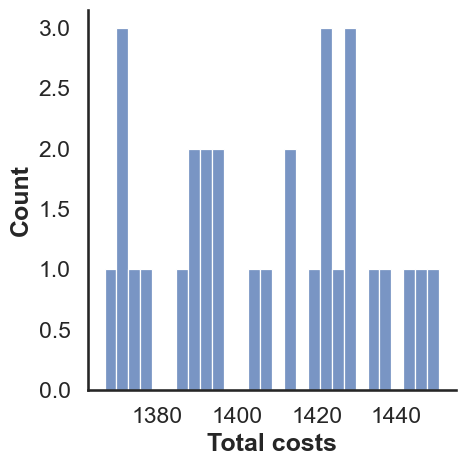

In [5]:
sns.displot(total_system_costs.T, x="Total costs", binwidth=3)

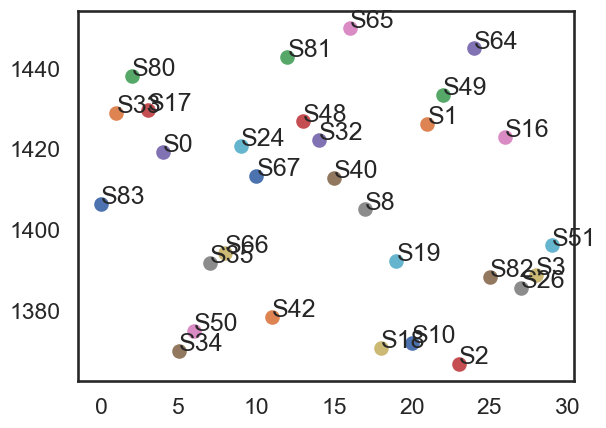

In [4]:
# plot on a graph the index 'Total costs' from total_system_costs
# the plot should only be
# annotate each point with the name of the column
fig, ax = plt.subplots()
for i, col in enumerate(total_system_costs.columns):
    ax.scatter(i, total_system_costs.loc['Total costs', col])
    ax.annotate(col, (i, total_system_costs.loc['Total costs', col]))
plt.show()

# Comparison policy scenarios costs

AttributeError: 'NoneType' object has no attribute 'loc'

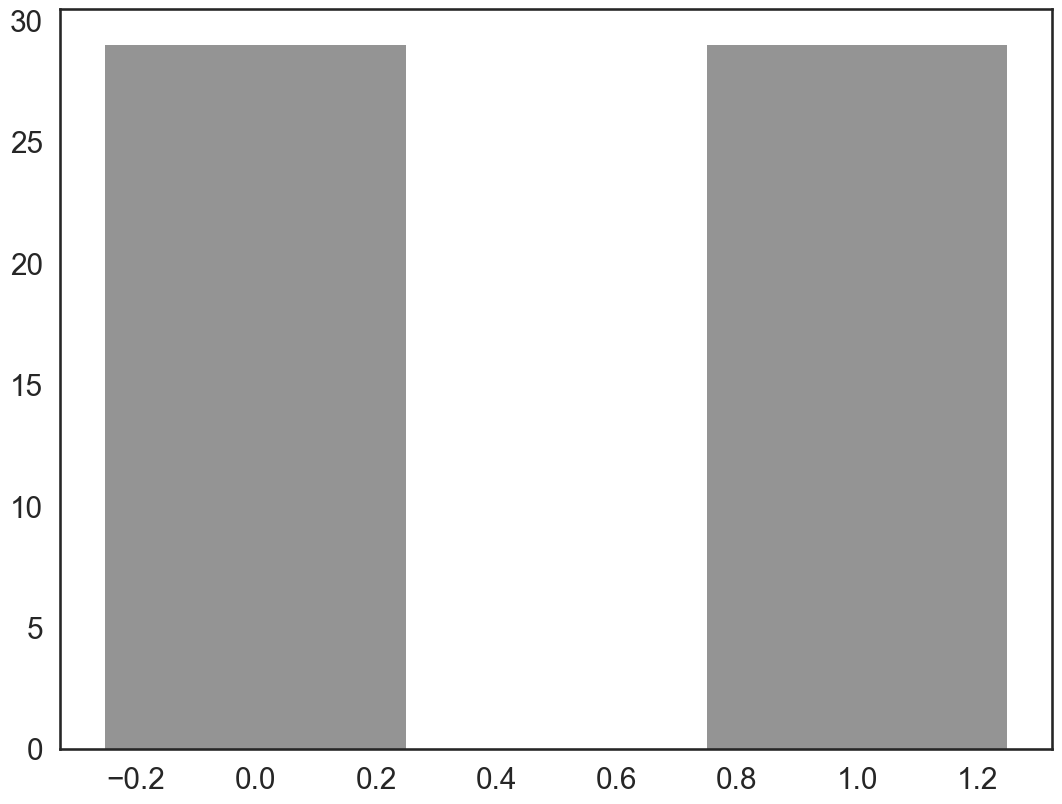

In [3]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'}, waterfall=True)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

# Sensitivity analysis

In [4]:
total_system_costs_2050_df = colormap_simulations(overall_folder=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  config_ref=None,
                                                  save_path=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  subset_configs=['Ban', 'BanRef', 'BanNoPolicy'],
                                                  percent=True,
                                                  reorder=['BanRef', 'BanNoPolicy'],
                                                  dict_scenario={
                                                      'BanRef': 'Package 2021 + Ban',
                                                      'BanNoPolicy': 'No Policy + Ban'
                                                  },
                                                  dict_config_demandsupply={
                                                      'Elasticity-': 'Lower Elasticity HP',
                                                      'LearningHP+': 'Technical Progress HP',
                                                      'biogasBiogas-': 'Lower Biogas Potential',
                                                      'capaNuc-': 'Lower Nuclear Potential',
                                                      'capaRen-': 'Lower Renewable Potential',
                                                      'capaRen+': 'Higher Renewable Potential',
                                                      'costscostsREN+': 'Higher Renewable Costs',
                                                      'demandReindustrialisation': 'Higher Electricity Demand',
                                                      'demandSobriete': 'Lower Electricity Demand',
                                                      'weather2012': 'Colder Weather'
                                                  }
                                                    )

# Hourly balance

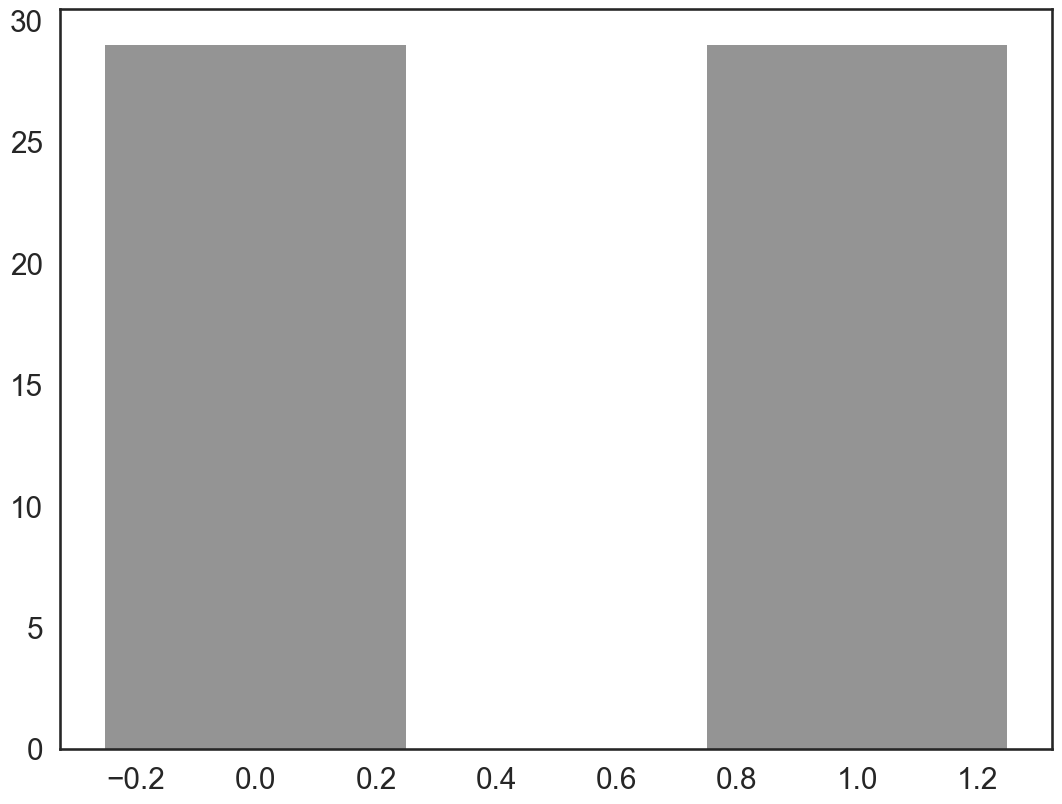

In [35]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [2]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [29]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

In [30]:
hourly_generation.hydrogen_charge.plot()

count    8760.000000
mean        4.584872
std         2.991499
min         0.000000
25%         4.212162
50%         4.566210
75%         6.055786
max         8.953740
Name: electrolysis, dtype: float64

In [31]:
hourly_generation.hydrogen.iloc[0:1000].plot()

In [34]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

0       28.181125
1       29.091650
2       29.437800
3       29.430275
4       29.106700
          ...    
8755    24.034850
8756    24.080000
8757    23.929500
8758    23.666125
8759    23.417800
Name: offshore_f, Length: 8760, dtype: float64

In [6]:
hourly_generation.hydrogen_in.describe()